In [38]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')


def griewank(x, gamma=4000):
    n = len(x)
    indices = np.array(range(1, n+1))
    sum_term = np.sum(x*x/gamma)
    prod_term = np.prod(np.cos(x/np.sqrt(indices)))
    return 1 + sum_term - prod_term


def plot_griewank():
    n = 100
    x = np.linspace(-5, 5, n)
    y = np.linspace(-5, 5, n)

    X, Y = np.meshgrid(x, y)
    Z = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            x = np.array([X[i][j], Y[i][j]])
            Z[i][j] = griewank(x)

    plt.contour(X, Y, Z, cmap='RdGy')
    plt.colorbar()


def grad_griewank(x, gamma=4000):
    n = len(x)
    indices = np.array(range(1, n+1))
    grad = [2*x[i]/gamma + np.prod(np.cos(x/np.sqrt(indices))) * (1/np.cos(x[i] / np.sqrt(i+1))) * np.sin(x[i] / np.sqrt(i+1)) * (1.0 / np.sqrt(i+1)) for i in range(n)]
    return np.array(grad)


def grad_is_approx_zero(grad, epsilon=1e-5):
    for grad_val in grad:
        if abs(grad_val) > epsilon:
            return False
    return True


def steepest_descent_griewank(x0, alpha=0.01, epsilon=1e-5, n_iter=10000, debug=False, gamma=4000):
    x_vals = []
    obj_vals = []
    grad_vals = []
    
    n = len(x0)
    x_curr = x0
    for i in range(n_iter):
        if debug:
            print("------------------------")
            print("Iteration: ", i)
            print(x_curr, griewank(x_curr, gamma))
            print("------------------------")
        
        grad = grad_griewank(x_curr, gamma)
        
        x_vals.append(x_curr)
        obj_vals.append(griewank(x_curr, gamma))
        grad_vals.append(grad)
        
        if grad_is_approx_zero(grad, epsilon):
            if debug:
                print("Solution found!", x_curr, griewank(x_curr, gamma), grad)
            break
        x_next = x_curr - alpha*grad
        x_curr = x_next
    results_df = pd.DataFrame({'x': x_vals, 'obj': obj_vals, 'grad': grad_vals})
    return x_curr, griewank(x_curr, gamma), results_df


def heavy_ball_griewank(x0, alpha=0.01, beta=0.9, epsilon=1e-5, n_iter=10000, debug=False, gamma=4000):
    x_vals = []
    obj_vals = []
    grad_vals = []
    
    n = len(x0)
    x_curr = x0
    x_prev = x0
    for i in range(n_iter):
    	if debug:
	        print("------------------------")
	        print("Iteration: ", i)
	        print(x_curr, griewank(x_curr))
	        print("------------------------")
        
        grad = grad_griewank(x_curr, gamma)
        
        x_vals.append(x_curr)
        obj_vals.append(griewank(x_curr))
        grad_vals.append(grad)
        
        if grad_is_approx_zero(grad, epsilon):
            if debug:
                print("Solution found!", x_curr, griewank(x_curr))
            break
        x_next = x_curr - alpha*grad + beta*(x_curr - x_prev)
        if debug:
        	print("Momentum!", x_curr-x_prev)
        x_prev = x_curr
        x_curr = x_next
    results_df = pd.DataFrame({'x': x_vals, 'obj': obj_vals, 'grad': grad_vals})
    return x_curr, griewank(x_curr, gamma), results_df


def run_griewank_test(algo='steepest_descent', gamma=4000, n_iter=1000, alpha=0.01, beta=0.9):
    results = {'x_opt': [], 'iterations': [], 'f_opt': []}
    for i in range(n_iter):
        print("Random Restart: {}".format(i))
        x_0 = np.random.uniform(low=-5, high=5, size=2)
        if algo == 'steepest_descent':
        	x_opt, f_opt, results_df = steepest_descent_griewank(x_0, alpha=alpha, gamma=gamma)
        elif algo == 'heavy_ball':
        	x_opt, f_opt, results_df = heavy_ball_griewank(x_0, alpha=alpha, beta=beta, gamma=gamma)
        else:
        	print "No such algorithm bro. The dude abides."
        	exit()
        results['x_opt'].append(x_opt)
        results['iterations'].append(results_df.shape[0])
        results['f_opt'].append(f_opt)
    results_df = pd.DataFrame(results)
    results_df['dist_to_origin'] = results_df.apply(lambda row: np.linalg.norm(row['x_opt']), axis=1)
    print results_df.describe()
    results_df.hist()
    return results_df

Random Restart: 0
Random Restart: 1
Random Restart: 2
Random Restart: 3
Random Restart: 4
Random Restart: 5
Random Restart: 6
Random Restart: 7
Random Restart: 8
Random Restart: 9
Random Restart: 10
Random Restart: 11
Random Restart: 12
Random Restart: 13
Random Restart: 14
Random Restart: 15
Random Restart: 16
Random Restart: 17
Random Restart: 18
Random Restart: 19
Random Restart: 20
Random Restart: 21
Random Restart: 22
Random Restart: 23
Random Restart: 24
Random Restart: 25
Random Restart: 26
Random Restart: 27
Random Restart: 28
Random Restart: 29
Random Restart: 30
Random Restart: 31
Random Restart: 32
Random Restart: 33
Random Restart: 34
Random Restart: 35
Random Restart: 36
Random Restart: 37
Random Restart: 38
Random Restart: 39
Random Restart: 40
Random Restart: 41
Random Restart: 42
Random Restart: 43
Random Restart: 44
Random Restart: 45
Random Restart: 46
Random Restart: 47
Random Restart: 48
Random Restart: 49
Random Restart: 50
Random Restart: 51
Random Restart: 52
Ran

Random Restart: 418
Random Restart: 419
Random Restart: 420
Random Restart: 421
Random Restart: 422
Random Restart: 423
Random Restart: 424
Random Restart: 425
Random Restart: 426
Random Restart: 427
Random Restart: 428
Random Restart: 429
Random Restart: 430
Random Restart: 431
Random Restart: 432
Random Restart: 433
Random Restart: 434
Random Restart: 435
Random Restart: 436
Random Restart: 437
Random Restart: 438
Random Restart: 439
Random Restart: 440
Random Restart: 441
Random Restart: 442
Random Restart: 443
Random Restart: 444
Random Restart: 445
Random Restart: 446
Random Restart: 447
Random Restart: 448
Random Restart: 449
Random Restart: 450
Random Restart: 451
Random Restart: 452
Random Restart: 453
Random Restart: 454
Random Restart: 455
Random Restart: 456
Random Restart: 457
Random Restart: 458
Random Restart: 459
Random Restart: 460
Random Restart: 461
Random Restart: 462
Random Restart: 463
Random Restart: 464
Random Restart: 465
Random Restart: 466
Random Restart: 467


Random Restart: 830
Random Restart: 831
Random Restart: 832
Random Restart: 833
Random Restart: 834
Random Restart: 835
Random Restart: 836
Random Restart: 837
Random Restart: 838
Random Restart: 839
Random Restart: 840
Random Restart: 841
Random Restart: 842
Random Restart: 843
Random Restart: 844
Random Restart: 845
Random Restart: 846
Random Restart: 847
Random Restart: 848
Random Restart: 849
Random Restart: 850
Random Restart: 851
Random Restart: 852
Random Restart: 853
Random Restart: 854
Random Restart: 855
Random Restart: 856
Random Restart: 857
Random Restart: 858
Random Restart: 859
Random Restart: 860
Random Restart: 861
Random Restart: 862
Random Restart: 863
Random Restart: 864
Random Restart: 865
Random Restart: 866
Random Restart: 867
Random Restart: 868
Random Restart: 869
Random Restart: 870
Random Restart: 871
Random Restart: 872
Random Restart: 873
Random Restart: 874
Random Restart: 875
Random Restart: 876
Random Restart: 877
Random Restart: 878
Random Restart: 879


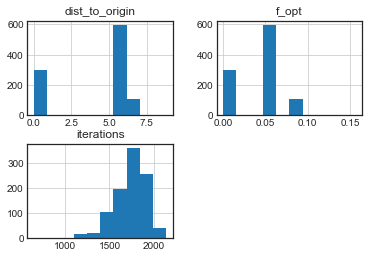

In [56]:
heavy_ball_results_df = run_griewank_test('heavy_ball', gamma=500, n_iter=1000, alpha=0.01, beta=0.99)

Random Restart: 0
Random Restart: 1
Random Restart: 2
Random Restart: 3
Random Restart: 4
Random Restart: 5
Random Restart: 6
Random Restart: 7
Random Restart: 8
Random Restart: 9
Random Restart: 10
Random Restart: 11
Random Restart: 12
Random Restart: 13
Random Restart: 14
Random Restart: 15
Random Restart: 16
Random Restart: 17
Random Restart: 18
Random Restart: 19
Random Restart: 20
Random Restart: 21
Random Restart: 22
Random Restart: 23
Random Restart: 24
Random Restart: 25
Random Restart: 26
Random Restart: 27
Random Restart: 28
Random Restart: 29
Random Restart: 30
Random Restart: 31
Random Restart: 32
Random Restart: 33
Random Restart: 34
Random Restart: 35
Random Restart: 36
Random Restart: 37
Random Restart: 38
Random Restart: 39
Random Restart: 40
Random Restart: 41
Random Restart: 42
Random Restart: 43
Random Restart: 44
Random Restart: 45
Random Restart: 46
Random Restart: 47
Random Restart: 48
Random Restart: 49
Random Restart: 50
Random Restart: 51
Random Restart: 52
Ran

Random Restart: 416
Random Restart: 417
Random Restart: 418
Random Restart: 419
Random Restart: 420
Random Restart: 421
Random Restart: 422
Random Restart: 423
Random Restart: 424
Random Restart: 425
Random Restart: 426
Random Restart: 427
Random Restart: 428
Random Restart: 429
Random Restart: 430
Random Restart: 431
Random Restart: 432
Random Restart: 433
Random Restart: 434
Random Restart: 435
Random Restart: 436
Random Restart: 437
Random Restart: 438
Random Restart: 439
Random Restart: 440
Random Restart: 441
Random Restart: 442
Random Restart: 443
Random Restart: 444
Random Restart: 445
Random Restart: 446
Random Restart: 447
Random Restart: 448
Random Restart: 449
Random Restart: 450
Random Restart: 451
Random Restart: 452
Random Restart: 453
Random Restart: 454
Random Restart: 455
Random Restart: 456
Random Restart: 457
Random Restart: 458
Random Restart: 459
Random Restart: 460
Random Restart: 461
Random Restart: 462
Random Restart: 463
Random Restart: 464
Random Restart: 465


Random Restart: 826
Random Restart: 827
Random Restart: 828
Random Restart: 829
Random Restart: 830
Random Restart: 831
Random Restart: 832
Random Restart: 833
Random Restart: 834
Random Restart: 835
Random Restart: 836
Random Restart: 837
Random Restart: 838
Random Restart: 839
Random Restart: 840
Random Restart: 841
Random Restart: 842
Random Restart: 843
Random Restart: 844
Random Restart: 845
Random Restart: 846
Random Restart: 847
Random Restart: 848
Random Restart: 849
Random Restart: 850
Random Restart: 851
Random Restart: 852
Random Restart: 853
Random Restart: 854
Random Restart: 855
Random Restart: 856
Random Restart: 857
Random Restart: 858
Random Restart: 859
Random Restart: 860
Random Restart: 861
Random Restart: 862
Random Restart: 863
Random Restart: 864
Random Restart: 865
Random Restart: 866
Random Restart: 867
Random Restart: 868
Random Restart: 869
Random Restart: 870
Random Restart: 871
Random Restart: 872
Random Restart: 873
Random Restart: 874
Random Restart: 875


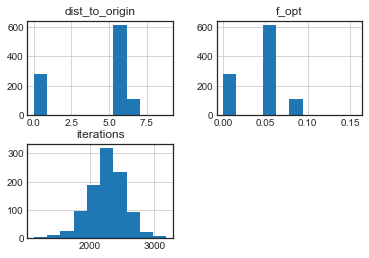

In [57]:
steepest_descent_results_df = run_griewank_test('steepest_descent', gamma=500, n_iter=1000, alpha=0.01, beta=0.99)

In [58]:
print "Optimal steepest_descent points", steepest_descent_results_df[steepest_descent_results_df['dist_to_origin'] < 1].shape[0]
print "Optimal heavy_ball points", heavy_ball_results_df[heavy_ball_results_df['dist_to_origin'] < 0.1].shape[0]

Optimal steepest_descent points 279
Optimal heavy_ball points 299


In [60]:
print "Optimal steepest_descent points", steepest_descent_results_df[steepest_descent_results_df['dist_to_origin'] < 1e-5].shape[0]
print "Optimal heavy_ball points", heavy_ball_results_df[heavy_ball_results_df['dist_to_origin'] < 1e-5].shape[0]

Optimal steepest_descent points 0
Optimal heavy_ball points 134


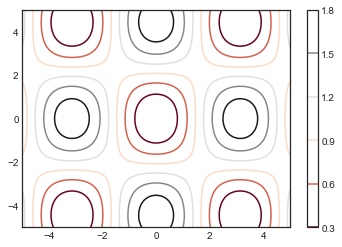

In [62]:
plot_griewank()

In [63]:
x = np.array([0, 0])
griewank(x)

0.0

In [65]:
x = np.array([3, -4.5])
griewank(x)

0.018127321322351397

In [66]:
x = np.array([3, 0])
griewank(x)

1.9899924966004454

In [68]:
heavy_ball_results_df.f_opt.mean()

0.0434549746782737

In [69]:
steepest_descent_results_df.f_opt.mean()

0.044866789435487976

In [72]:
heavy_ball_results_df.head()

,f_opt,iterations,x_opt,dist_to_origin
0,5.882562e-02,1782,"[3.1290796826605316, -4.4076004359179475]",5.405375
1,5.882562e-02,1928,"[-3.129063241300169, -4.407623455767494]",5.405384
2,5.882562e-02,1709,"[-3.129076839282747, -4.4076247869210325]",5.405393
3,5.882562e-02,1869,"[3.1290757415481094, -4.407615872725096]",5.405386
4,7.786360e-11,1938,"[9.949328273610656e-06, 1.0573064092075741e-05]",0.000015
